# Semantic Analysis

In [94]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [95]:
path = '/Users/kenzaamara/Storage/syntax-shap'
data_save_dir = "/Users/kenzaamara/GithubProjects/syntax-shap/data"

#root_dir = "/cluster/home/kamara/syntax-shap"
#data_save_dir = "/cluster/home/kamara/syntax-shap/data"

dataset = "negation"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


In [97]:

folder_path = os.path.join(path, f"results/explanations/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            if eval(seed) == seed_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['tokens'].apply(len)
                df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


,input_id,input,tokens,token_ids,explanation,algorithm,n_token
0,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]","[0.20492837, 0.86268157, 1.2397658, 5.432964]",svsampling,4
1,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]","[-0.30600104, 1.1881001, 0.8500203, 7.6858444]",svsampling,4
2,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]","[0.13439833, 0.54848653, 1.3802226, 5.3254786]",svsampling,4
3,414,Peter is a groom without a,"[Peter, is, a, groom, without, a]","[19727, 318, 257, 32443, 1231, 257]","[0.16461116, -0.077765256, -0.7361093, 12.1213...",svsampling,6
4,530,A person has no,"[A, person, has, no]","[32, 1048, 468, 645]","[-0.5390133, 1.4203396, 2.948345, 5.008343]",svsampling,4
...,...,...,...,...,...,...,...
3733,70,Anaheim is not located in,"[An, a, heim, is, not, located, in]","[2025, 64, 9096, 318, 407, 5140, 287]","[0.041868935645878076, -0.04394437402128172, -...",syntax,7
3734,277,A chicken has,"[A, chicken, has]","[32, 9015, 468]","[0.11819464399959015, 0.058800764092091236, 0....",syntax,3
3735,9,A dad is a,"[A, dad, is, a]","[32, 9955, 318, 257]","[0.1288646405127117, 0.1445384307001051, 0.293...",syntax,4
3736,359,Kate is a aunt with a,"[Kate, is, a, aunt, with, a]","[45087, 318, 257, 25949, 351, 257]","[0.11519224832480825, 0.0924940265072175, -0.0...",syntax,6


## Without and the uninteresting predictions "a" and "the"...

In [10]:
df_explanation['without'] = df_explanation['input'].apply(lambda x: x.endswith('without') or x.endswith('with'))
df_without = df_explanation[df_explanation['without']==True]

In [11]:
df_without

,input_id,input,tokens,token_ids,explanation,algorithm,n_token,without
0,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]","[0.20492837, 0.86268157, 1.2397658, 5.432964]",svsampling,4,True
1,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]","[-0.30600104, 1.1881001, 0.8500203, 7.6858444]",svsampling,4,True
2,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]","[0.13439833, 0.54848653, 1.3802226, 5.3254786]",svsampling,4,True
10,281,A bird sees with,"[A, bird, sees, with]","[32, 6512, 7224, 351]","[-0.1295092, 0.59282625, 2.4542089, 6.214807]",svsampling,4,True
13,475,A bicycle moves with,"[A, bicycle, moves, with]","[32, 17026, 6100, 351]","[0.34148777, 1.3829604, 0.14863877, 5.091663]",svsampling,4,True
...,...,...,...,...,...,...,...,...
3721,177,An airplane flies with,"[An, airplane, flies, with]","[2025, 19401, 17607, 351]","[0.00549210951273416, 0.09157470336484416, 0.0...",syntax,4,True
3723,448,A wolf sees without,"[A, wolf, sees, without]","[32, 17481, 7224, 1231]","[0.10926609700586222, 0.15508139852581268, 0.1...",syntax,4,True
3724,431,A horse sees with,"[A, horse, sees, with]","[32, 8223, 7224, 351]","[0.10983516433863492, 0.1413771419813739, 0.10...",syntax,4,True
3727,174,A bird flies without,"[A, bird, flies, without]","[32, 6512, 17607, 1231]","[0.1571406887765271, 0.11262438150158492, 0.10...",syntax,4,True


In [15]:
df_str = pd.read_csv(os.path.join(data_save_dir, f"{dataset}/seed_{seed_}/{dataset}_{model_name}_{seed_}_predictions.csv"))
labels = ["a", "the"]

df_str

,input_id,input,y
0,0,A boy is not a,fool
1,1,A boy is a,young
2,2,A girl is not a,girl
3,3,A girl is a,girl
4,4,A brother is not a,murderer
...,...,...,...
529,529,A person has,no
530,530,A person has no,right
531,531,A person has,no
532,532,A person does not have,to


In [16]:
df_w = pd.merge(df_without, df_str, on=['input', 'input_id'])

In [17]:
df_w['tokens'] = df_w['input'].apply(lambda x: x.split())
df_w['without_pos'] = df_w['tokens'].apply(lambda x: [i for i, j in enumerate(x) if j in ['without', 'with']])

In [18]:
df_w['without_rank']= df_w.apply(lambda x: np.where(np.flip(np.argsort(x['explanation']))==x['without_pos'])[0].item()+1, axis=1)

In [19]:
df_w

,input_id,input,tokens,token_ids,explanation,algorithm,n_token,without,y,without_pos,without_rank
0,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]","[0.20492837, 0.86268157, 1.2397658, 5.432964]",svsampling,4,True,a,[3],1
1,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]","[-0.30600104, 1.1881001, 0.8500203, 7.6858444]",svsampling,4,True,a,[3],1
2,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]","[0.13439833, 0.54848653, 1.3802226, 5.3254786]",svsampling,4,True,a,[3],1
3,281,A bird sees with,"[A, bird, sees, with]","[32, 6512, 7224, 351]","[-0.1295092, 0.59282625, 2.4542089, 6.214807]",svsampling,4,True,its,[3],1
4,475,A bicycle moves with,"[A, bicycle, moves, with]","[32, 17026, 6100, 351]","[0.34148777, 1.3829604, 0.14863877, 5.091663]",svsampling,4,True,the,[3],1
...,...,...,...,...,...,...,...,...,...,...,...
877,177,An airplane flies with,"[An, airplane, flies, with]","[2025, 19401, 17607, 351]","[0.00549210951273416, 0.09157470336484416, 0.0...",syntax,4,True,a,[3],1
878,448,A wolf sees without,"[A, wolf, sees, without]","[32, 17481, 7224, 1231]","[0.10926609700586222, 0.15508139852581268, 0.1...",syntax,4,True,a,[3],1
879,431,A horse sees with,"[A, horse, sees, with]","[32, 8223, 7224, 351]","[0.10983516433863492, 0.1413771419813739, 0.10...",syntax,4,True,its,[3],1
880,174,A bird flies without,"[A, bird, flies, without]","[32, 6512, 17607, 1231]","[0.1571406887765271, 0.11262438150158492, 0.10...",syntax,4,True,a,[3],1


In [20]:
def is_a(x):
    return 'a'in x.split() or 'the' in x.split()

df_w['is_a'] = df_w['y'].apply(lambda x: is_a(str(x)))
df_a = df_w[df_w['is_a']==True]
df_a

,input_id,input,tokens,token_ids,explanation,algorithm,n_token,without,y,without_pos,without_rank,is_a
0,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]","[0.20492837, 0.86268157, 1.2397658, 5.432964]",svsampling,4,True,a,[3],1,True
1,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]","[-0.30600104, 1.1881001, 0.8500203, 7.6858444]",svsampling,4,True,a,[3],1,True
2,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]","[0.13439833, 0.54848653, 1.3802226, 5.3254786]",svsampling,4,True,a,[3],1,True
4,475,A bicycle moves with,"[A, bicycle, moves, with]","[32, 17026, 6100, 351]","[0.34148777, 1.3829604, 0.14863877, 5.091663]",svsampling,4,True,the,[3],1,True
6,306,A wolf sees without,"[A, wolf, sees, without]","[32, 17481, 7224, 1231]","[-0.007850242, 0.94503295, 1.1146317, 5.186515]",svsampling,4,True,a,[3],1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
876,288,A cat sees without,"[A, cat, sees, without]","[32, 3797, 7224, 1231]","[0.08444457838981652, 0.0631630158701016, 0.05...",syntax,4,True,a,[3],1,True
877,177,An airplane flies with,"[An, airplane, flies, with]","[2025, 19401, 17607, 351]","[0.00549210951273416, 0.09157470336484416, 0.0...",syntax,4,True,a,[3],1,True
878,448,A wolf sees without,"[A, wolf, sees, without]","[32, 17481, 7224, 1231]","[0.10926609700586222, 0.15508139852581268, 0.1...",syntax,4,True,a,[3],1,True
880,174,A bird flies without,"[A, bird, flies, without]","[32, 6512, 17607, 1231]","[0.1571406887765271, 0.11262438150158492, 0.10...",syntax,4,True,a,[3],1,True


In [21]:
df_a['input_id'].nunique()

76

In [23]:
df_a.groupby(['algorithm']).mean(numeric_only=True).reset_index()


,algorithm,input_id,n_token,without,without_rank,is_a
0,ablation,293.236842,4.0,1.0,1.381579,1.0
1,hedge,293.236842,4.0,1.0,2.421053,1.0
2,lime,293.236842,4.0,1.0,2.750000,1.0
3,random,293.236842,4.0,1.0,2.486842,1.0
4,svsampling,293.236842,4.0,1.0,1.394737,1.0
5,syntax,293.236842,4.0,1.0,1.473684,1.0
6,syntax-w,293.236842,4.0,1.0,1.460526,1.0


                 [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
algorithm                                                      
Random            23.684211   31.578947   17.105263   27.631579
LIME              13.157895   28.947368   27.631579   30.263158
FeatureAblation   86.842105    0.000000    5.263158    7.894737
SampleShapley     86.842105    2.631579    3.947368    6.578947
Partition         23.684211   35.526316   26.315789   14.473684
SyntaxShap        84.210526    5.263158    2.631579    7.894737
SyntaxShap-W      78.947368   13.157895    1.315789    6.578947
                 [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
algorithm                                                      
Random            23.684211   31.578947   17.105263   27.631579
LIME              13.157895   28.947368   27.631579   30.263158
FeatureAblation   86.842105    0.000000    5.263158    7.894737
SampleShapley     86.842105    2.631579    3.947368    6.578947
Partition         23.684211   35.526316 

<Figure size 2400x2400 with 0 Axes>

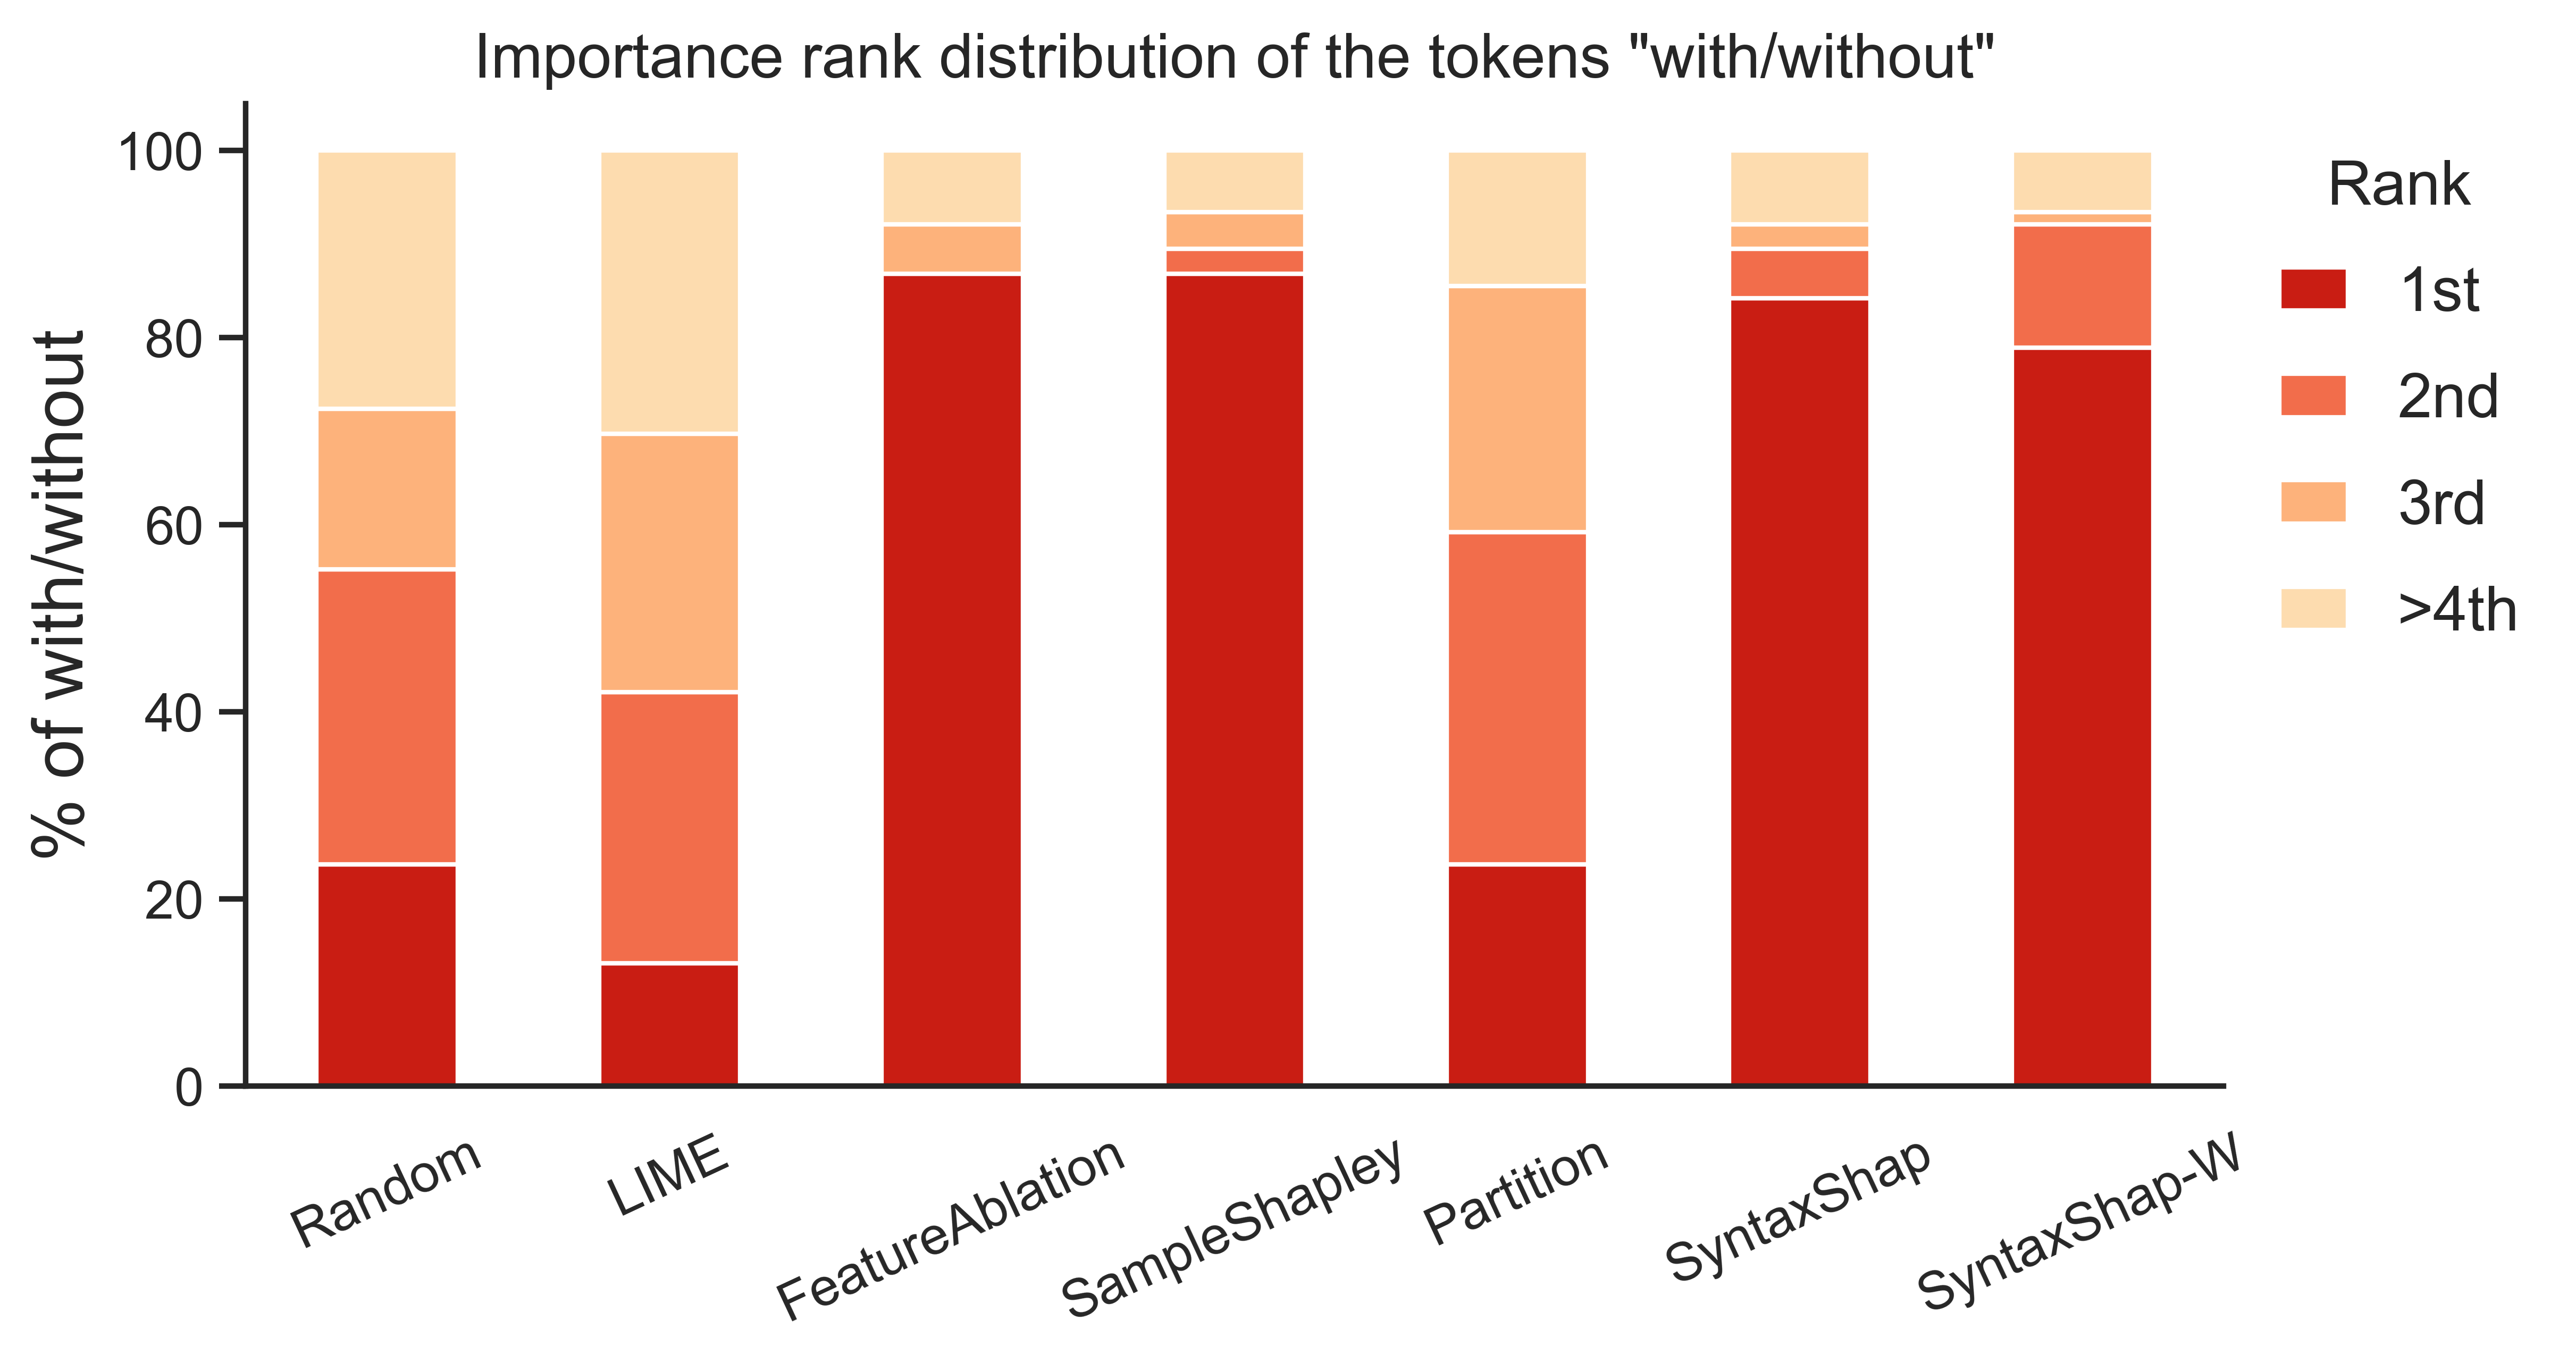

In [28]:

df = df_a

# Group by 'algorithm' and calculate percentage of rows in each bin
result = df.groupby('algorithm')['without_rank'].apply(lambda x: pd.cut(x, bins=[1, 2, 3, 4, float('inf')], right=False).value_counts(normalize=True) * 100).unstack().fillna(0)
#result.reset_index(inplace=True)
# Reorder rows and rename index
result = result.rename(index={'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
result = result.reindex(["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"])

print(result)



sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 12, "ytick.labelsize" : 12})
# Plot with increasing hue from Viridis colormap
plt.figure(figsize=(4,4))
result.plot(kind='bar', stacked=True, color=sns.color_palette("OrRd_r", n_colors=len(result.columns)), width=0.5, edgecolor='white', figsize=(8,4))

plt.title('Importance rank distribution of the tokens "with/without"', fontsize=14)
plt.xlabel('')
plt.ylabel('% of with/without', fontsize=16)
plt.xticks(rotation=25)
# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False)

# Move the legend outside on the upper right side of the plot
# Rewrite legend with custom labels and title
leg = plt.legend(labels=['1st', '2nd', '3rd', '>4th'], title='Rank', bbox_to_anchor=(1, 1), fontsize=14, loc='upper left', frameon=False, handlelength=1.1, labelspacing=0.8)
leg.get_title().set_fontsize('14')  # Increase legend title font size
for line in leg.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

sns.despine()

#plt.tight_layout()
print(result)
plt.savefig(f"{path}/figures/semantic_analysis/{dataset}_{model_name}_seed_{seed_}_with_without_ranks.png", bbox_inches='tight', dpi=600)
plt.show()


## Importance of Negations when the model does not capture them

In [98]:

folder_path = os.path.join(path, f"results/scores/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(threshold) == threshold_) and (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['token_ids'].apply(len)

                # Append to the list of dataframes
                df_list.append(df)

df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token
0,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",svsampling,4
1,0.064726,0.057887,0.064726,-2.247381,0.5,0.110891,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]",svsampling,4
2,0.029249,-0.013927,0.037616,0.314970,0.6,0.196784,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]",svsampling,4
3,0.453871,0.292180,0.453871,-1.032125,0.4,0.422216,414,Peter is a groom without a,"[Peter, is, a, groom, without, a]","[19727, 318, 257, 32443, 1231, 257]",svsampling,6
4,0.089345,0.089345,0.089345,-11.400272,0.1,0.557758,530,A person has no,"[A, person, has, no]","[32, 1048, 468, 645]",svsampling,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3565,-0.071231,-0.033085,-0.101857,0.557985,0.3,0.065187,70,Anaheim is not located in,"[An, a, heim, is, not, located, in]","[2025, 64, 9096, 318, 407, 5140, 287]",syntax,7
3566,0.016602,0.006931,0.020654,-0.245482,0.6,0.133852,277,A chicken has,"[A, chicken, has]","[32, 9015, 468]",syntax,3
3567,-0.000481,0.011682,0.011682,-9.365856,0.4,0.236723,9,A dad is a,"[A, dad, is, a]","[32, 9955, 318, 257]",syntax,4
3568,0.005131,0.010826,0.032632,-0.403090,0.4,0.152396,359,Kate is a aunt with a,"[Kate, is, a, aunt, with, a]","[45087, 318, 257, 25949, 351, 257]",syntax,6


In [99]:
df_str = pd.read_csv(os.path.join(data_save_dir, f"{dataset}/seed_{seed_}/{dataset}_{model_name}_{seed_}_labeled_predictions.csv"))
df_str

,input_id,input,y,label
0,0,A boy is not a,fool,NaN
1,1,A boy is a,young,NaN
2,2,A girl is not a,girl,0.0
3,3,A girl is a,girl,NaN
4,4,A brother is not a,murderer,NaN
...,...,...,...,...
529,529,A person has,no,NaN
530,530,A person has no,right,NaN
531,531,A person has,no,NaN
532,532,A person does not have,to,NaN


In [100]:
df_label = df_str[(df_str['label'].notna()) & (df_str['label'] == 0)]
df_label

negations = ["not", "without", "no"]

df_label['tokens'] = df_label['input'].apply(lambda x: x.split())
df_label['neg_pos'] = df_label['tokens'].apply(lambda x: [i for i, j in enumerate(x) if j in negations])

/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_36346/3823840268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['tokens'] = df_label['input'].apply(lambda x: x.split())
/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_36346/3823840268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['neg_pos'] = df_label['tokens'].apply(lambda x: [i for i, j in enumerate(x) if j in negations])


In [101]:
sample = pd.merge(df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
sample_with_y = pd.merge(sample, df_label, on=['input', 'input_id'])

In [102]:
def normalize(x):
    x = np.array(x)
    return (x - np.min(x)) / (np.max(x) - np.min(x))

sample_with_y['explanation'] = sample_with_y['explanation'].apply(lambda x: normalize(x))

/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_36346/2680253911.py:3: RuntimeWarning: invalid value encountered in divide
  return (x - np.min(x)) / (np.max(x) - np.min(x))


In [54]:
"""df_lime = sample_with_y[sample_with_y['algorithm'] == 'lime']
has_nan_explanation = df_lime['explanation'].apply(lambda x: any(pd.isna(x)))
# Print the rows with NaN values in 'explanation'
rows_with_nan_explanation = df_lime[~has_nan_explanation]
filtered_ids = rows_with_nan_explanation['input_id']

sample_with_y = sample_with_y[sample_with_y['input_id'].isin(filtered_ids)]"""

"df_lime = sample_with_y[sample_with_y['algorithm'] == 'lime']\nhas_nan_explanation = df_lime['explanation'].apply(lambda x: any(pd.isna(x)))\n# Print the rows with NaN values in 'explanation'\nrows_with_nan_explanation = df_lime[~has_nan_explanation]\nfiltered_ids = rows_with_nan_explanation['input_id']\n\nsample_with_y = sample_with_y[sample_with_y['input_id'].isin(filtered_ids)]"

In [103]:
sample_with_y['neg_val']= sample_with_y.apply(lambda x: x['explanation'][x['neg_pos'][0]], axis=1)
sample_with_y['neg_rank']= sample_with_y.apply(lambda x: np.where(np.flip(np.argsort(x['explanation']))==x['neg_pos'])[0].item()+1, axis=1)

In [104]:
sample_with_y['input_id'].nunique()

22

                 [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
algorithm                                                      
Random            22.727273   13.636364   18.181818   45.454545
LIME              28.571429   21.428571   21.428571   28.571429
FeatureAblation   18.181818   22.727273   40.909091   18.181818
SampleShapley     36.363636    4.545455   36.363636   22.727273
Partition         13.636364   27.272727   31.818182   27.272727
SyntaxShap        27.272727   22.727273   27.272727   22.727273
SyntaxShap-W      27.272727   22.727273   18.181818   31.818182
                 [1.0, 2.0)  [2.0, 3.0)  [3.0, 4.0)  [4.0, inf)
algorithm                                                      
Random            22.727273   13.636364   18.181818   45.454545
LIME              28.571429   21.428571   21.428571   28.571429
FeatureAblation   18.181818   22.727273   40.909091   18.181818
SampleShapley     36.363636    4.545455   36.363636   22.727273
Partition         13.636364   27.272727 

<Figure size 2400x2400 with 0 Axes>

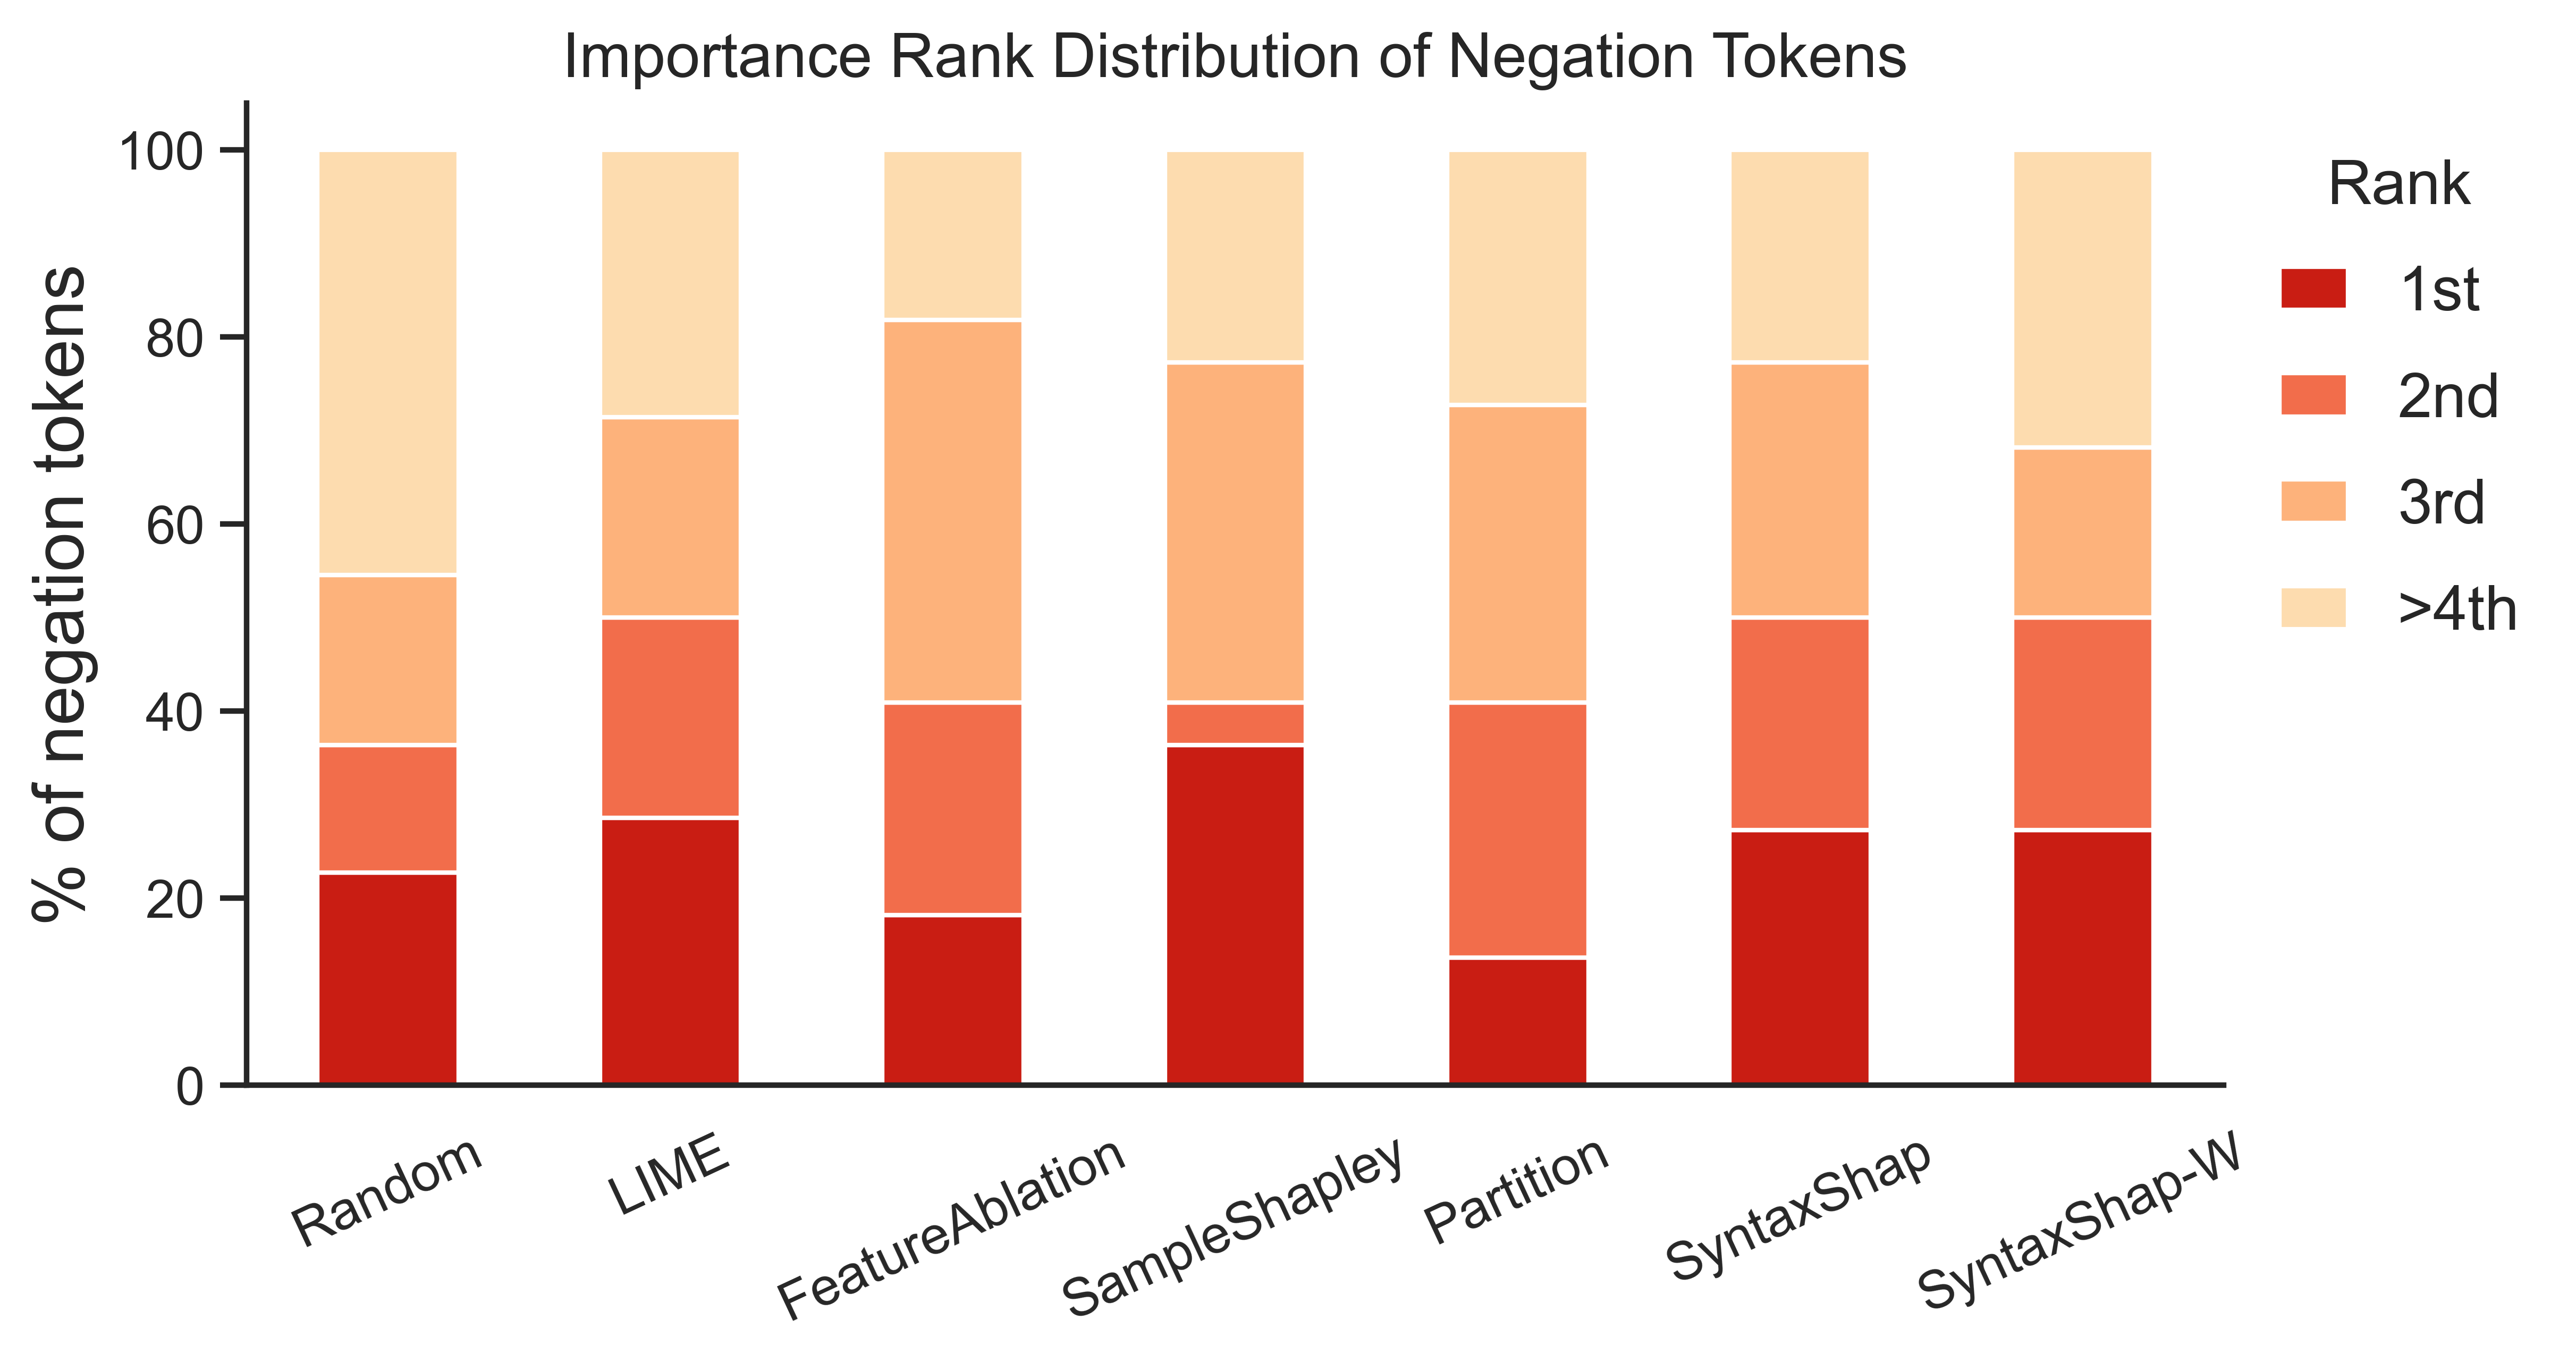

In [107]:

df = sample_with_y.copy()

# Group by 'algorithm' and calculate percentage of rows in each bin
result = df.groupby('algorithm')['neg_rank'].apply(lambda x: pd.cut(x, bins=[1, 2, 3, 4, float('inf')], right=False).value_counts(normalize=True) * 100).unstack().fillna(0)
#result.reset_index(inplace=True)
# Reorder rows and rename index
result = result.rename(index={'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
result = result.reindex(["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"])

print(result)


sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 12, "ytick.labelsize" : 12})
# Plot with increasing hue from Viridis colormap
plt.figure(figsize=(4,4))
result.plot(kind='bar', stacked=True, color=sns.color_palette("OrRd_r", n_colors=len(result.columns)), width=0.5, edgecolor='white', figsize=(8,4))

plt.title('Importance Rank Distribution of Negation Tokens', fontsize=14)
plt.xlabel('')
plt.ylabel('% of negation tokens', fontsize=16)
plt.xticks(rotation=25)
# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False)

# Move the legend outside on the upper right side of the plot
# Rewrite legend with custom labels and title
leg = plt.legend(labels=['1st', '2nd', '3rd', '>4th'], title='Rank', bbox_to_anchor=(1, 1), fontsize=14, loc='upper left', frameon=False, handlelength=1.1, labelspacing=0.8)
leg.get_title().set_fontsize('14')  # Increase legend title font size
for line in leg.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

sns.despine()

#plt.tight_layout()
print(result)
plt.savefig(f"{path}/figures/semantic_analysis/{dataset}_{model_name}_seed_{seed_}_negation_ranks.png", bbox_inches='tight', dpi=600)
plt.show()


In [58]:
df_neg = sample_with_y.groupby(['algorithm']).mean(numeric_only=True).reset_index()
df_neg

,algorithm,input_id,n_token,without,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,label,neg_val,neg_rank
0,ablation,285.142857,5.142857,0.0,0.131166,0.110944,0.146071,-4.854404,0.342857,0.337930,0.0,0.400333,2.642857
1,hedge,285.142857,5.142857,0.0,0.075566,0.071834,0.084424,-7.558458,0.207143,0.401328,0.0,0.511077,3.142857
2,lime,285.142857,5.142857,0.0,0.089359,0.089359,0.062376,-10.661735,0.057143,0.541471,0.0,0.658564,2.571429
3,random,285.142857,5.142857,0.0,0.129529,0.134770,0.131773,-8.606364,0.150000,0.493833,0.0,0.571861,2.714286
4,svsampling,285.142857,5.142857,0.0,0.108834,0.107888,0.146071,-5.484580,0.328571,0.351608,0.0,0.491852,2.571429
5,syntax,285.142857,5.142857,0.0,0.116875,0.095547,0.132880,-4.305682,0.300000,0.373882,0.0,0.539147,2.428571
6,syntax-w,285.142857,5.142857,0.0,0.108320,0.103219,0.132880,-4.567151,0.228571,0.417544,0.0,0.479097,2.642857


In [91]:
sample_with_y

,input_id,input,tokens_x,token_ids_x,explanation,algorithm,n_token,without,fid_keep_rd,fid_keep,...,acc_at_k,prob_diff_at_k,tokens_y,token_ids_y,y,label,tokens,neg_pos,neg_val,neg_rank
0,422,Anna is a bride without a,"[Anna, is, a, bride, without, a]","[31160, 318, 257, 26619, 1231, 257]","[0.048381563, 0.0, 0.17817962, 0.7416542, 0.42...",SampleShapley,6,False,0.189469,0.133235,...,0.7,0.220248,"[Anna, is, a, bride, without, a]","[31160, 318, 257, 26619, 1231, 257]",husband,0.0,"[Anna, is, a, bride, without, a]",[4],0.421241,3
1,380,Maria is a wife without a,"[Maria, is, a, wife, without, a]","[46827, 318, 257, 3656, 1231, 257]","[0.0, 0.25214314, 0.355106, 0.6155221, 0.37071...",SampleShapley,6,False,0.428062,0.307755,...,0.4,0.385066,"[Maria, is, a, wife, without, a]","[46827, 318, 257, 3656, 1231, 257]",husband,0.0,"[Maria, is, a, wife, without, a]",[4],0.370711,3
2,382,Anna is a wife without a,"[Anna, is, a, wife, without, a]","[31160, 318, 257, 3656, 1231, 257]","[0.09478429, 0.17362246, 0.0, 1.0, 0.35530356,...",SampleShapley,6,False,0.320295,0.337039,...,0.5,0.367662,"[Anna, is, a, wife, without, a]","[31160, 318, 257, 3656, 1231, 257]",husband,0.0,"[Anna, is, a, wife, without, a]",[4],0.355304,3
3,6,A sister is not a,"[A, sister, is, not, a]","[32, 6621, 318, 407, 257]","[0.0, 0.45460513, 0.30845216, 0.3252371, 1.0]",SampleShapley,5,False,0.007768,-0.006809,...,0.1,0.326388,"[A, sister, is, not, a]","[32, 6621, 318, 407, 257]",person,0.0,"[A, sister, is, not, a]",[3],0.325237,3
4,8,A dad is not a,"[A, dad, is, not, a]","[32, 9955, 318, 407, 257]","[0.0, 0.23172988, 0.10844518, 0.19939964, 1.0]",SampleShapley,5,False,0.010283,0.010283,...,0.1,0.443018,"[A, dad, is, not, a]","[32, 9955, 318, 407, 257]",father,0.0,"[A, dad, is, not, a]",[3],0.199400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,266,A bird has no,"[A, bird, has, no]","[32, 6512, 468, 645]","[0.0, 0.512886294247485, 0.8083609992993206, 1.0]",SyntaxShap,4,False,0.131732,0.131732,...,0.1,0.515207,"[A, bird, has, no]","[32, 6512, 468, 645]",feathers,0.0,"[A, bird, has, no]",[3],1.000000,1
94,428,Kate is a bride without a,"[Kate, is, a, bride, without, a]","[45087, 318, 257, 26619, 1231, 257]","[0.26408039183442233, 0.21578788030077298, 0.0...",SyntaxShap,6,False,0.234364,0.234364,...,0.2,0.636446,"[Kate, is, a, bride, without, a]","[45087, 318, 257, 26619, 1231, 257]",husband,0.0,"[Kate, is, a, bride, without, a]",[4],0.245084,4
95,388,Kate is a wife without a,"[Kate, is, a, wife, without, a]","[45087, 318, 257, 3656, 1231, 257]","[0.15219607235559252, 0.20632097474056446, 0.0...",SyntaxShap,6,False,0.493870,0.358192,...,0.5,0.378896,"[Kate, is, a, wife, without, a]","[45087, 318, 257, 3656, 1231, 257]",husband,0.0,"[Kate, is, a, wife, without, a]",[4],0.291910,3
96,420,Maria is a bride without a,"[Maria, is, a, bride, without, a]","[46827, 318, 257, 26619, 1231, 257]","[0.2061733025424204, 0.22760890769444225, 0.0,...",SyntaxShap,6,False,-0.005587,0.004184,...,0.7,0.244697,"[Maria, is, a, bride, without, a]","[46827, 318, 257, 26619, 1231, 257]",husband,0.0,"[Maria, is, a, bride, without, a]",[4],0.228654,3


      algorithm   neg_val
0    svsampling  0.421241
1    svsampling  0.370711
2    svsampling  0.355304
3    svsampling  1.000000
4    svsampling  0.325237
..          ...       ...
141      syntax  1.000000
142      syntax  1.000000
143      syntax  0.291910
144      syntax  0.228654
145      syntax  0.434289

[146 rows x 2 columns]


/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_36346/2076474269.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarn

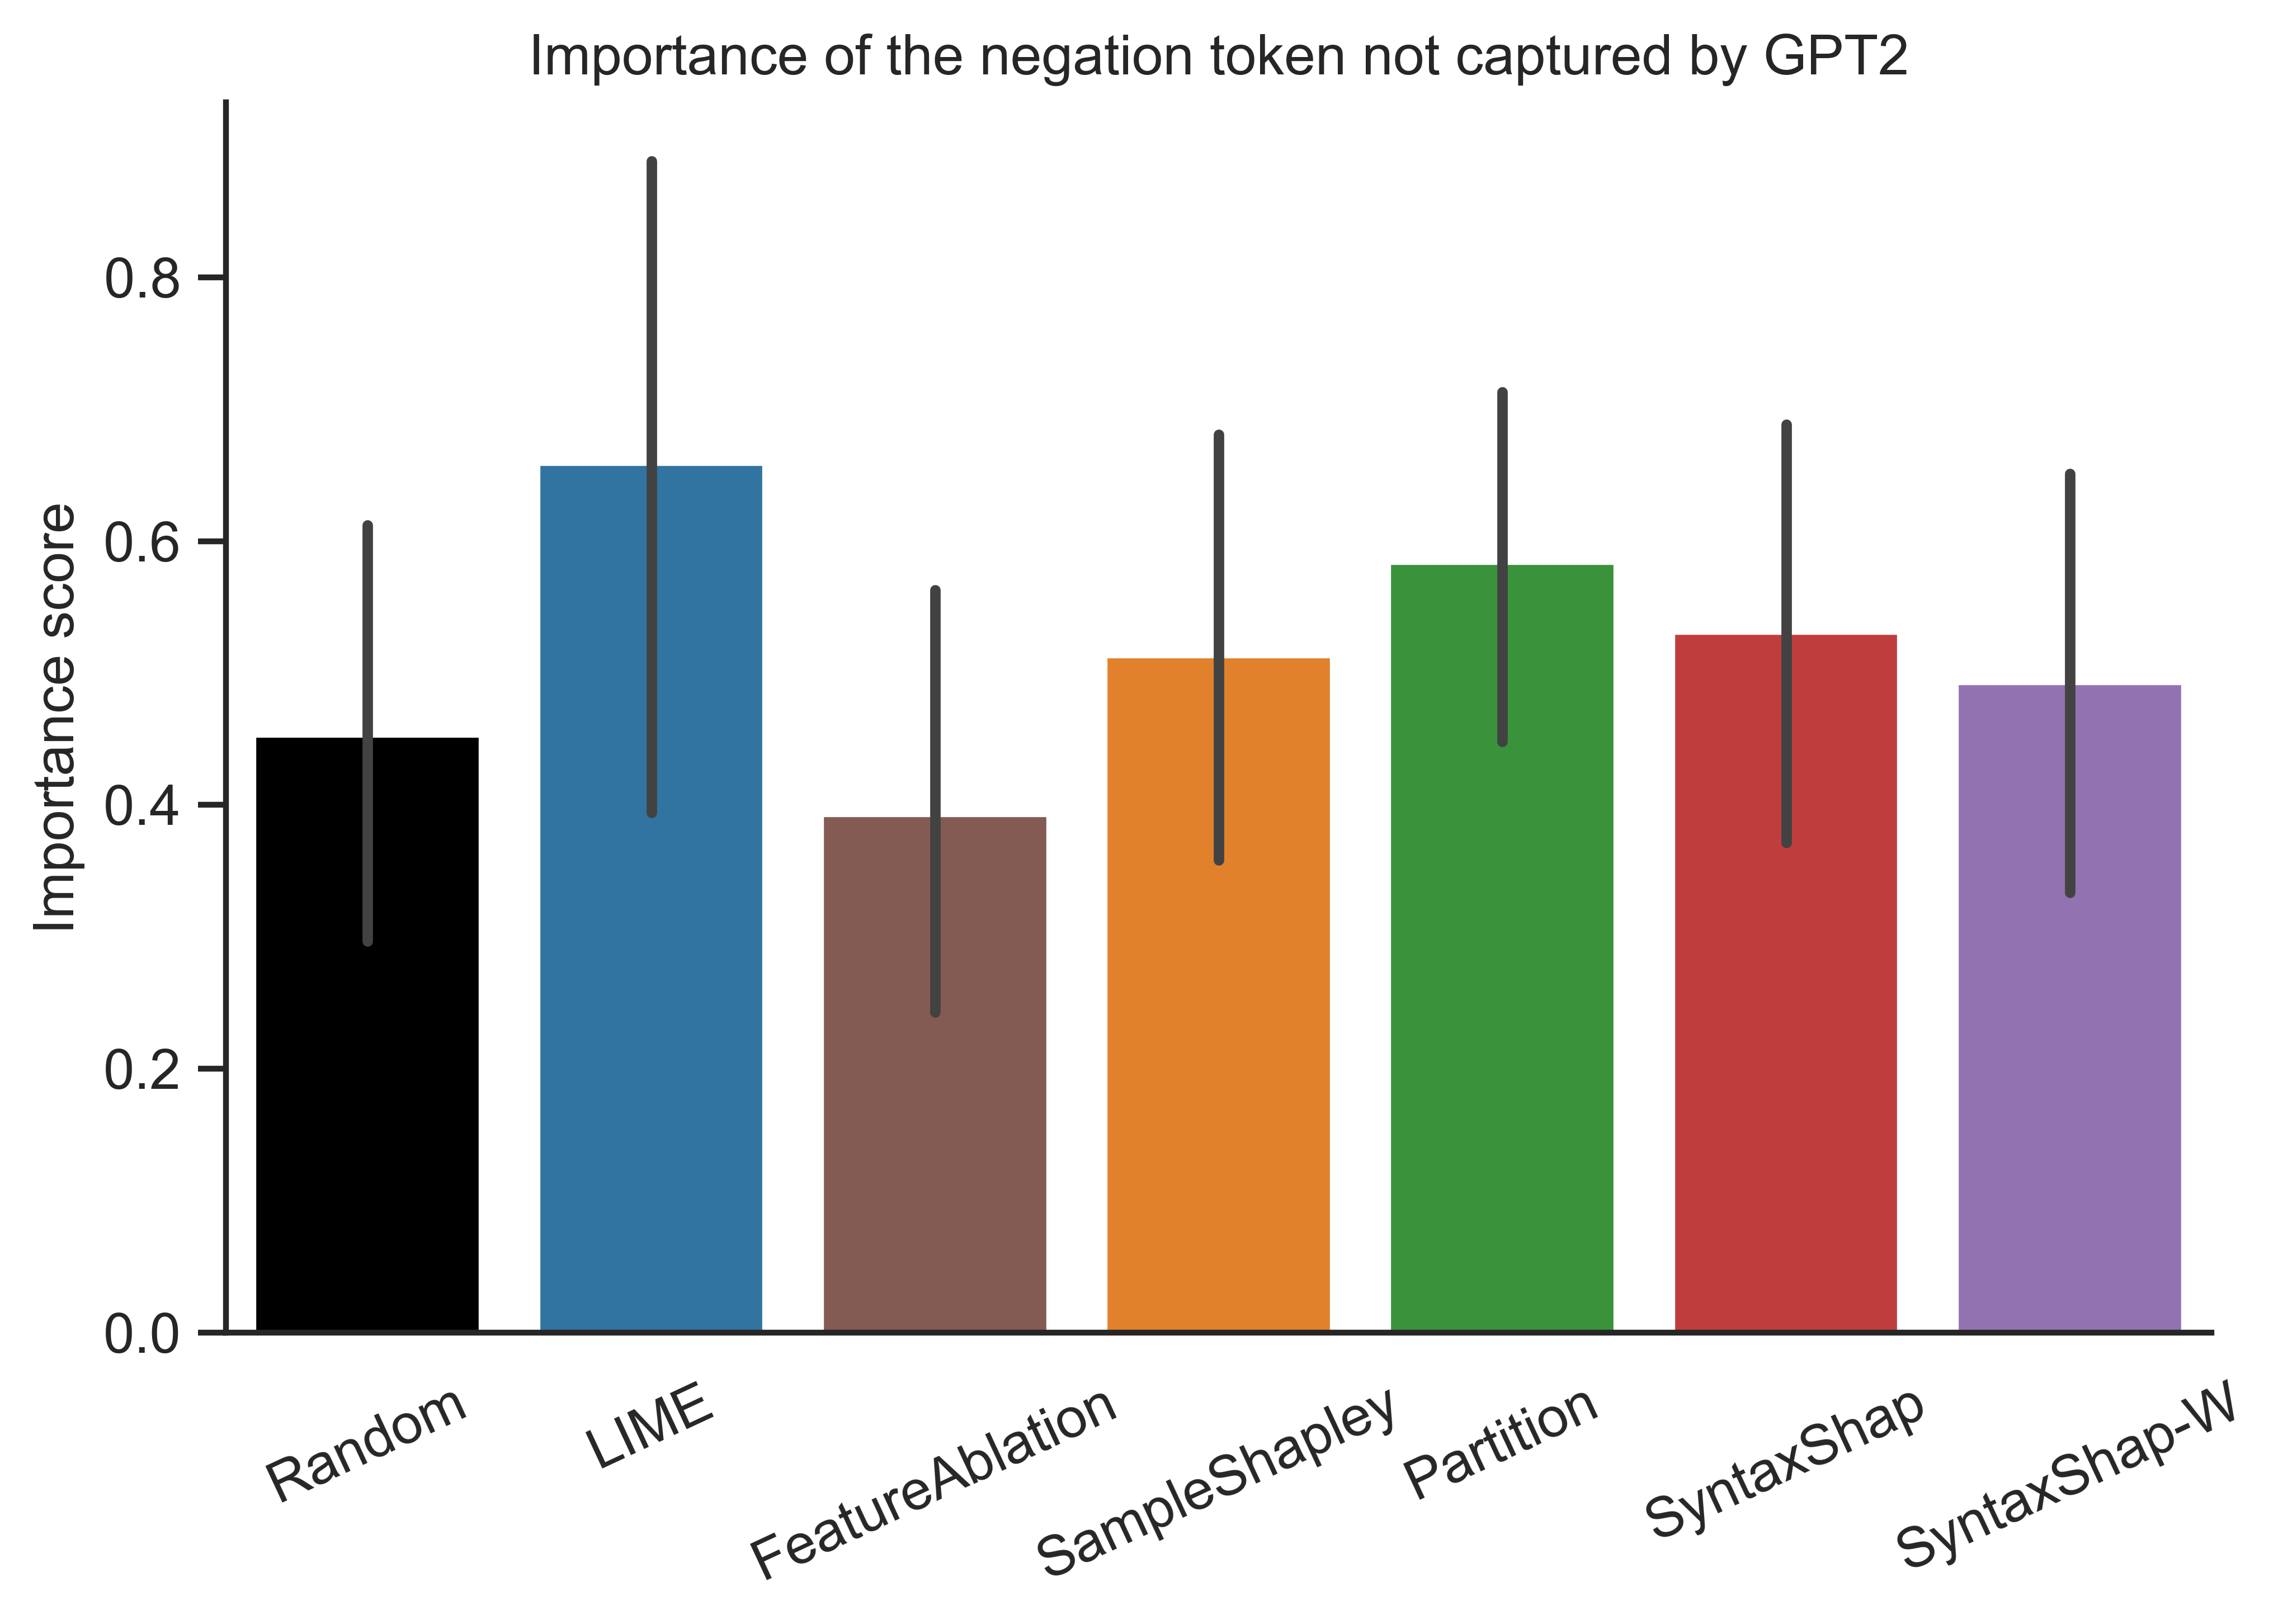

In [105]:
# Plot
df = sample_with_y.copy()
df = df[['algorithm', 'neg_val']]
print(df)

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 


# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 12, "ytick.labelsize" : 12})


plt.figure(figsize=(7,5))


sns.barplot(data=df, x='algorithm', y='neg_val', hue='algorithm', palette=dict_color)#, errorbar='se')
plt.title('Importance of the negation token not captured by GPT2')
plt.ylabel('Importance score')
plt.xlabel('')
plt.xticks(rotation=25)
# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False)
sns.despine()
plt.tight_layout()

plt.savefig(f"{path}/figures/semantic_analysis/{dataset}_{model_name}_seed_{seed_}_negation_importance.png", bbox_inches='tight', dpi=600)

      algorithm  neg_rank
0    svsampling         3
1    svsampling         3
2    svsampling         3
3    svsampling         1
4    svsampling         3
..          ...       ...
141      syntax         1
142      syntax         1
143      syntax         3
144      syntax         3
145      syntax         3

[146 rows x 2 columns]


/var/folders/2h/f06x9_xj7170hdxzgdbhs_7c0000gn/T/ipykernel_36346/573588049.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kenzaamara/opt/anaconda3/envs/shap/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarni

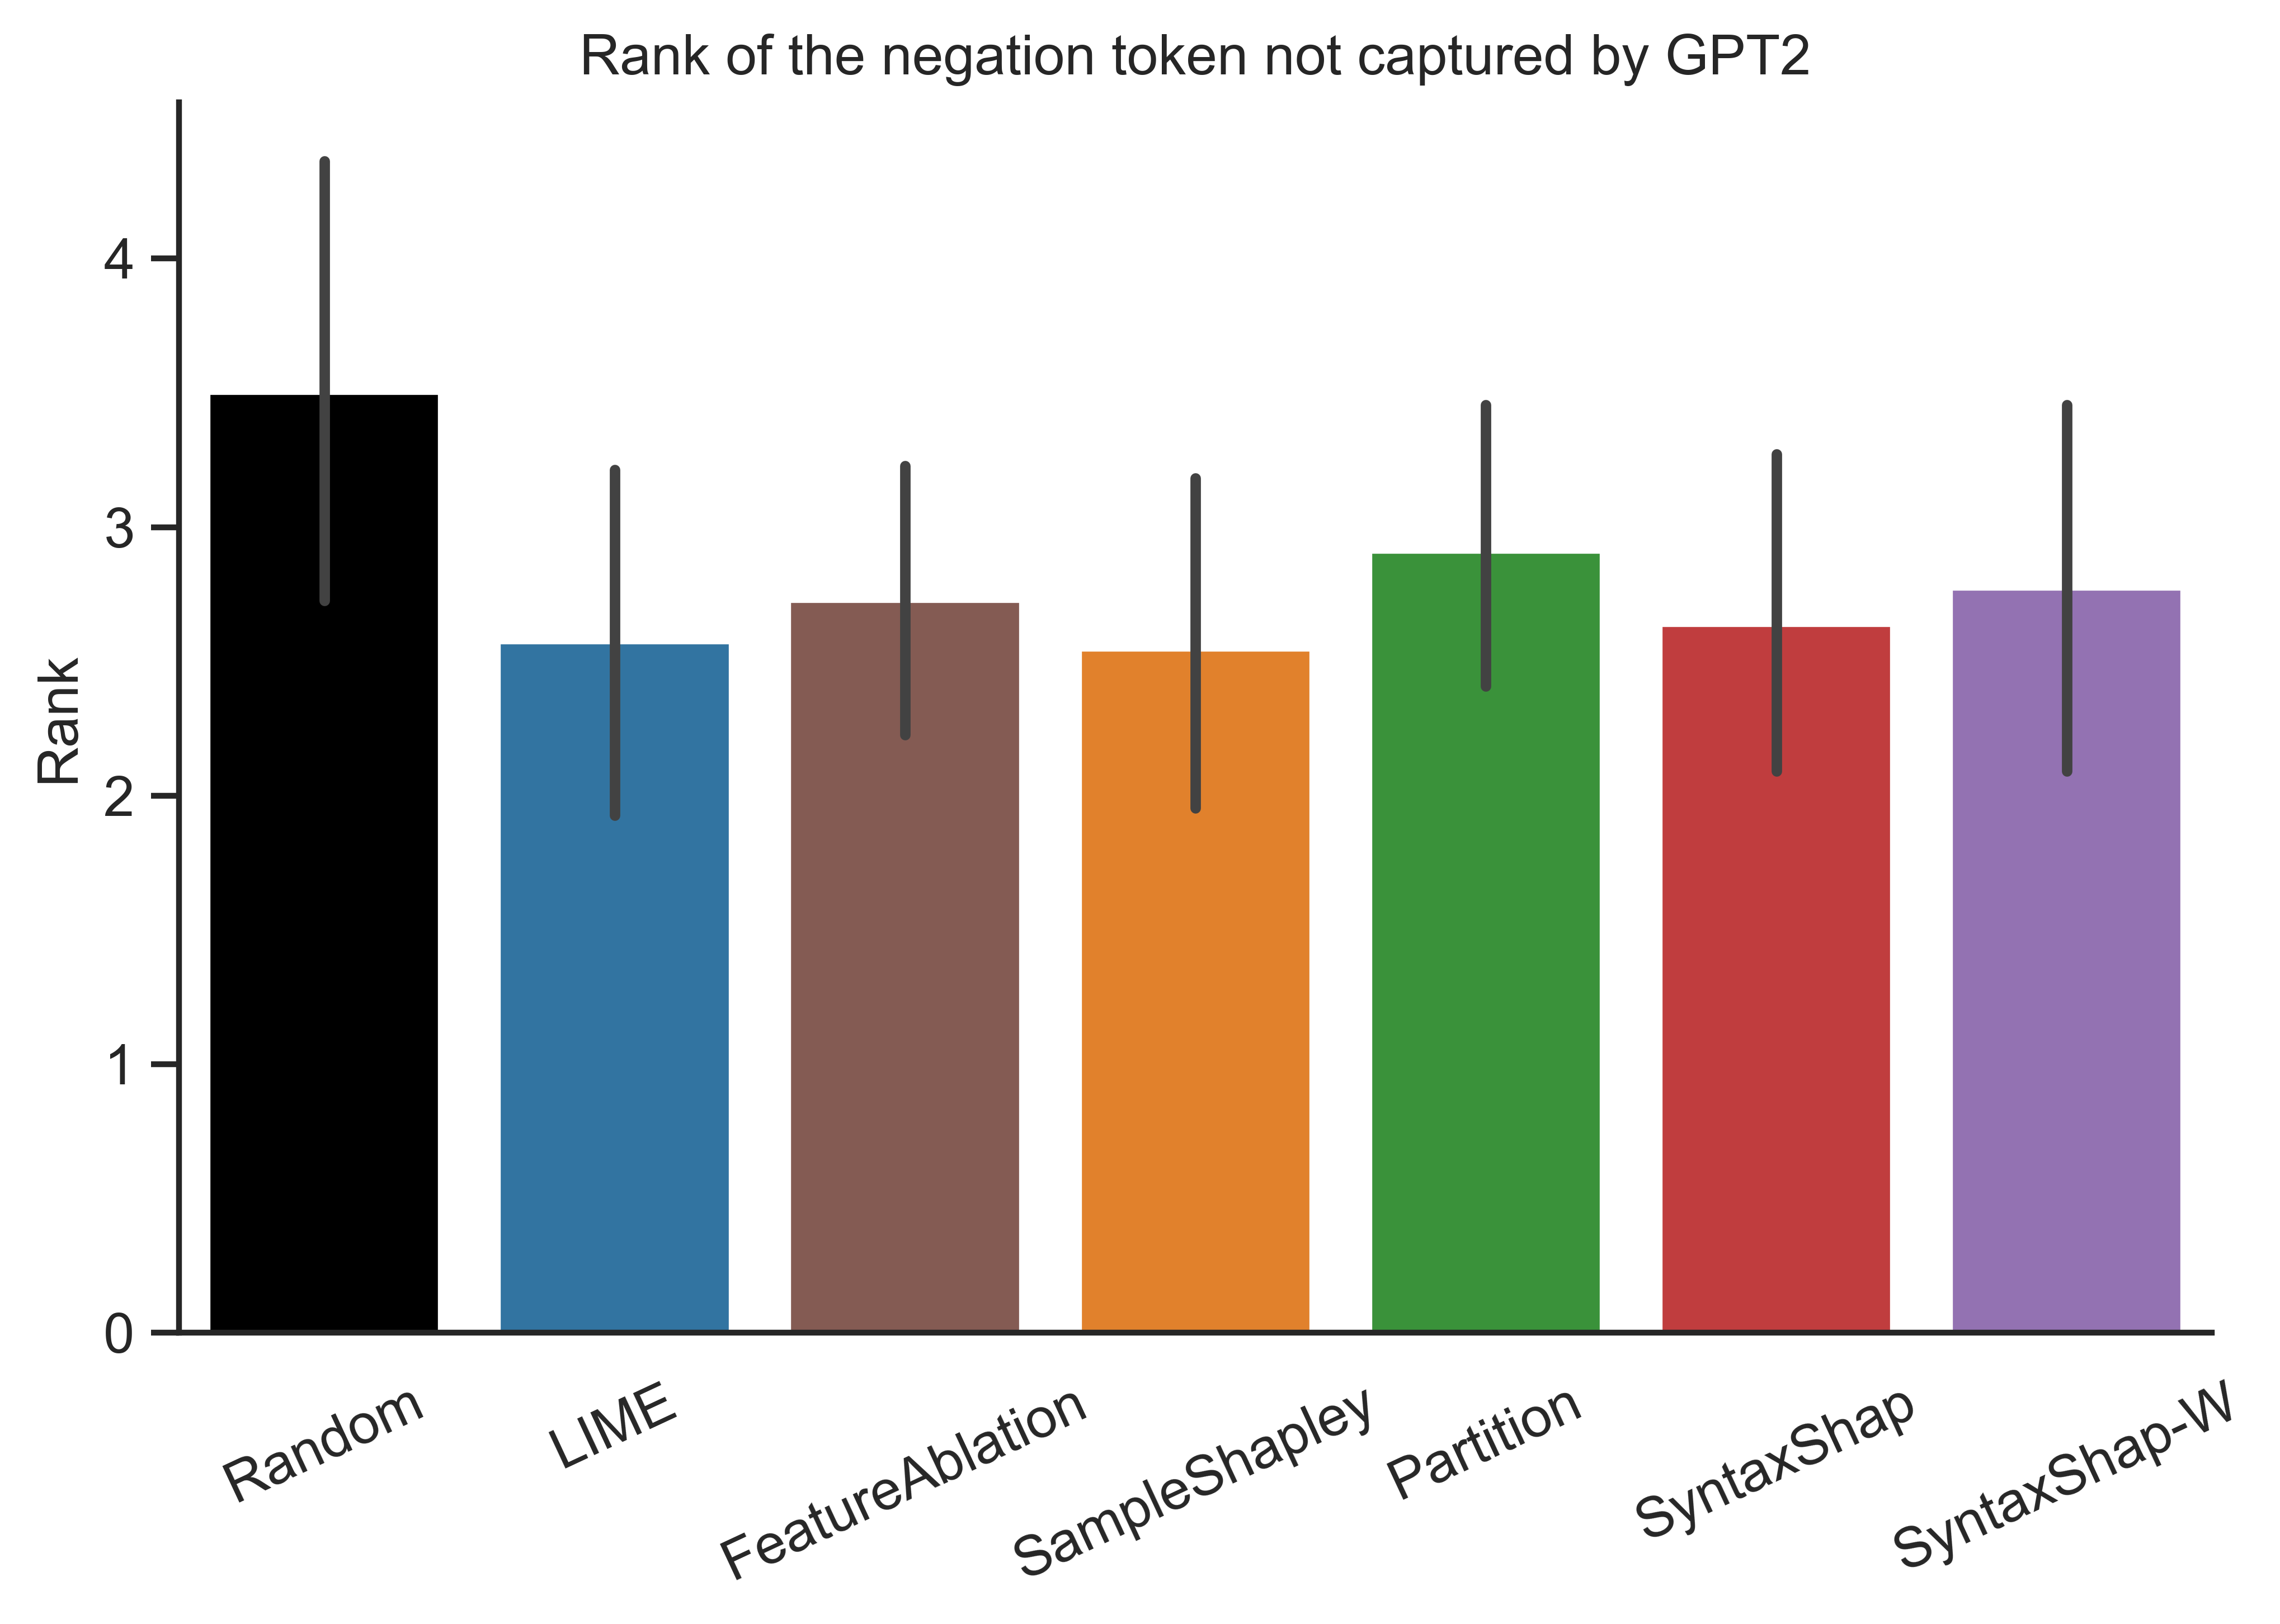

In [106]:
# Plot
df = sample_with_y.copy()
df = df[['algorithm', 'neg_rank']]
print(df)

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 


# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 12, "ytick.labelsize" : 12})


plt.figure(figsize=(7,5))


sns.barplot(data=df, x='algorithm', y='neg_rank', hue='algorithm', palette=dict_color)#, errorbar='se')
plt.title('Rank of the negation token not captured by GPT2')
plt.ylabel('Rank')
plt.xlabel('')
plt.xticks(rotation=25)
# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False)
sns.despine()
plt.tight_layout()

plt.savefig(f"{path}/figures/semantic_analysis/{dataset}_{model_name}_seed_{seed_}_negation_rank.png", bbox_inches='tight', dpi=600)

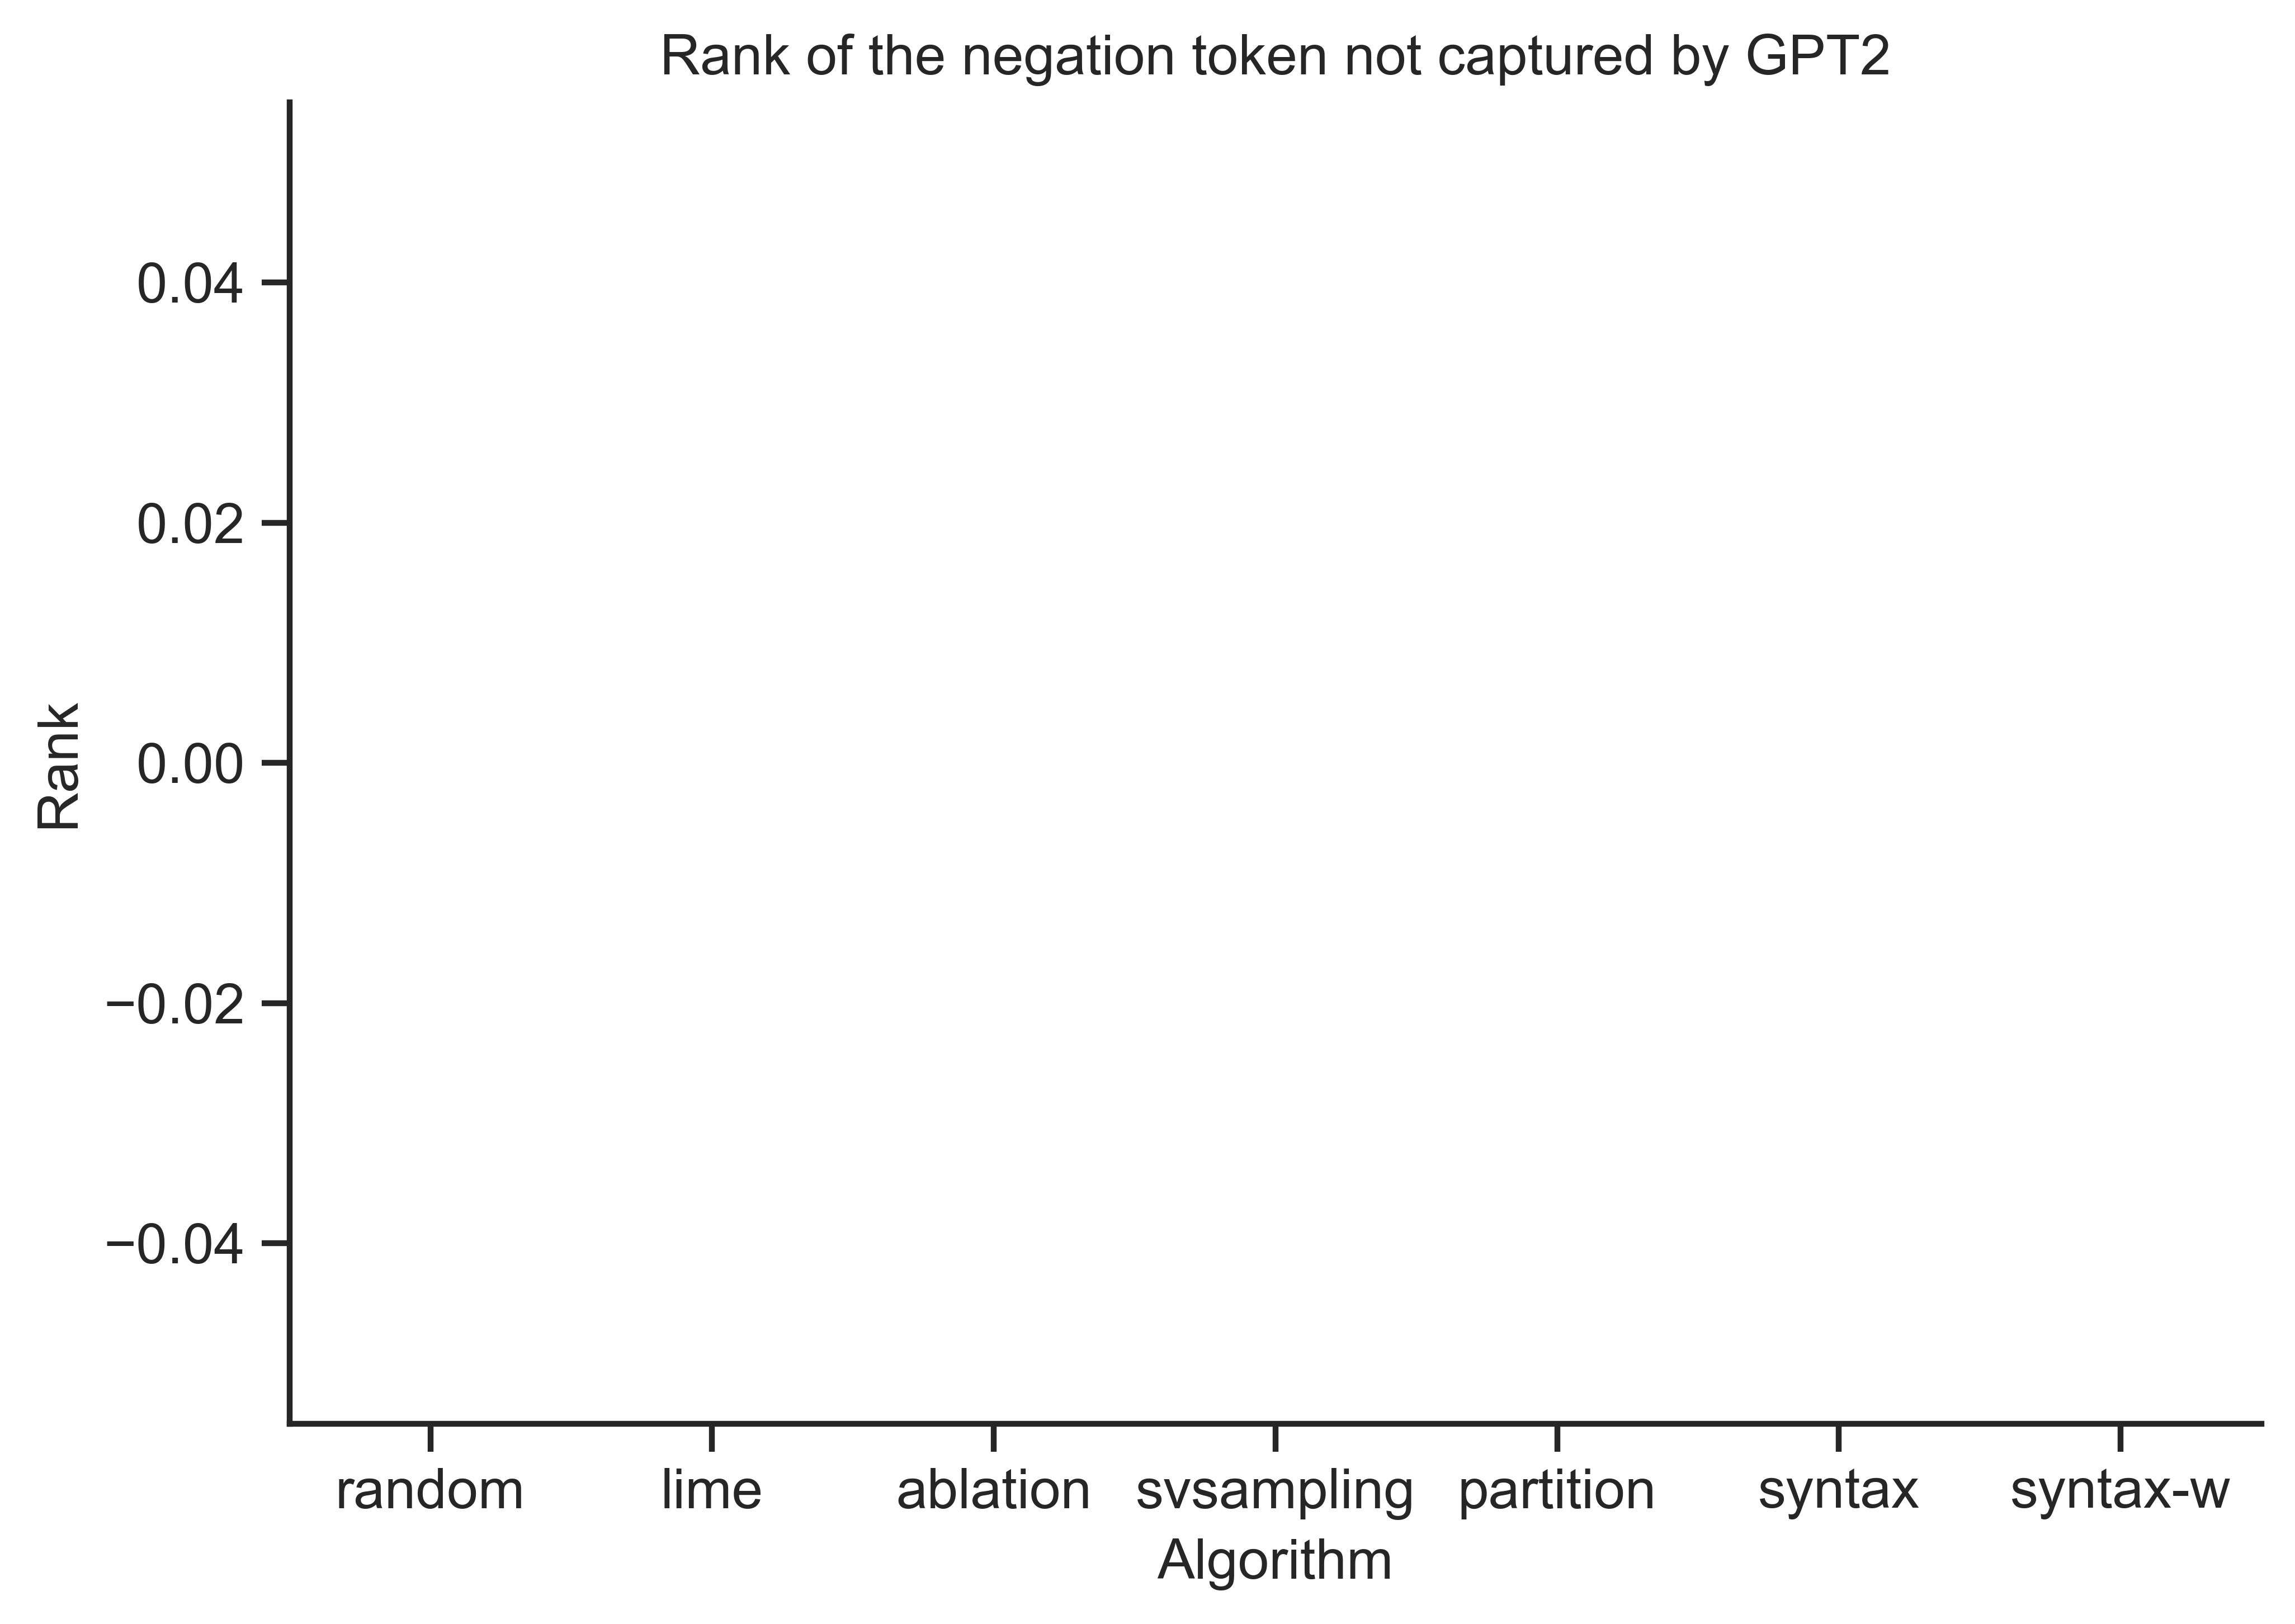

In [93]:
# Plot
df = sample_with_y.copy()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 12, "ytick.labelsize" : 12})


plt.figure(figsize=(7,5))
sns.barplot(data=df, x='algorithm', y='neg_rank', errorbar='se')
plt.title('Rank of the negation token not captured by GPT2')
plt.xlabel('Algorithm')
plt.ylabel('Rank')
sns.despine()
plt.tight_layout()

plt.savefig(f"{path}/figures/semantic_analysis/{dataset}_{model_name}_seed_{seed_}_negation_rank.png", bbox_inches='tight', dpi=600)

In [61]:
#for i in selected_indices:
i = selected_indices[0]
instance = sample_with_y[sample_with_y['input_id']==i]
info = instance.groupby(['input_id', 'input', 'y', 'label', 'n_token']).mean().reset_index()
print("input_id: ", info['input_id'])
print("input: ", info['input'])  
instance['tokens'] = instance['input'].apply(lambda x: x.split())
df = instance[['tokens', 'explanation', 'algorithm']]
df = df.apply(pd.Series.explode)
df['rank'] = df.groupby('algorithm')['explanation'].transform(lambda x: x.rank())



    #df#.pivot(index='tokens', columns='algorithm', values='explanation').plot(kind='bar', stacked=True)
    

input_id:  0    2
Name: input_id, dtype: int64
input:  0    A girl is not a
Name: input, dtype: object


/tmp/ipykernel_26212/2115529381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instance['tokens'] = instance['input'].apply(lambda x: x.split())


<AxesSubplot:xlabel='tokens', ylabel='rank'>

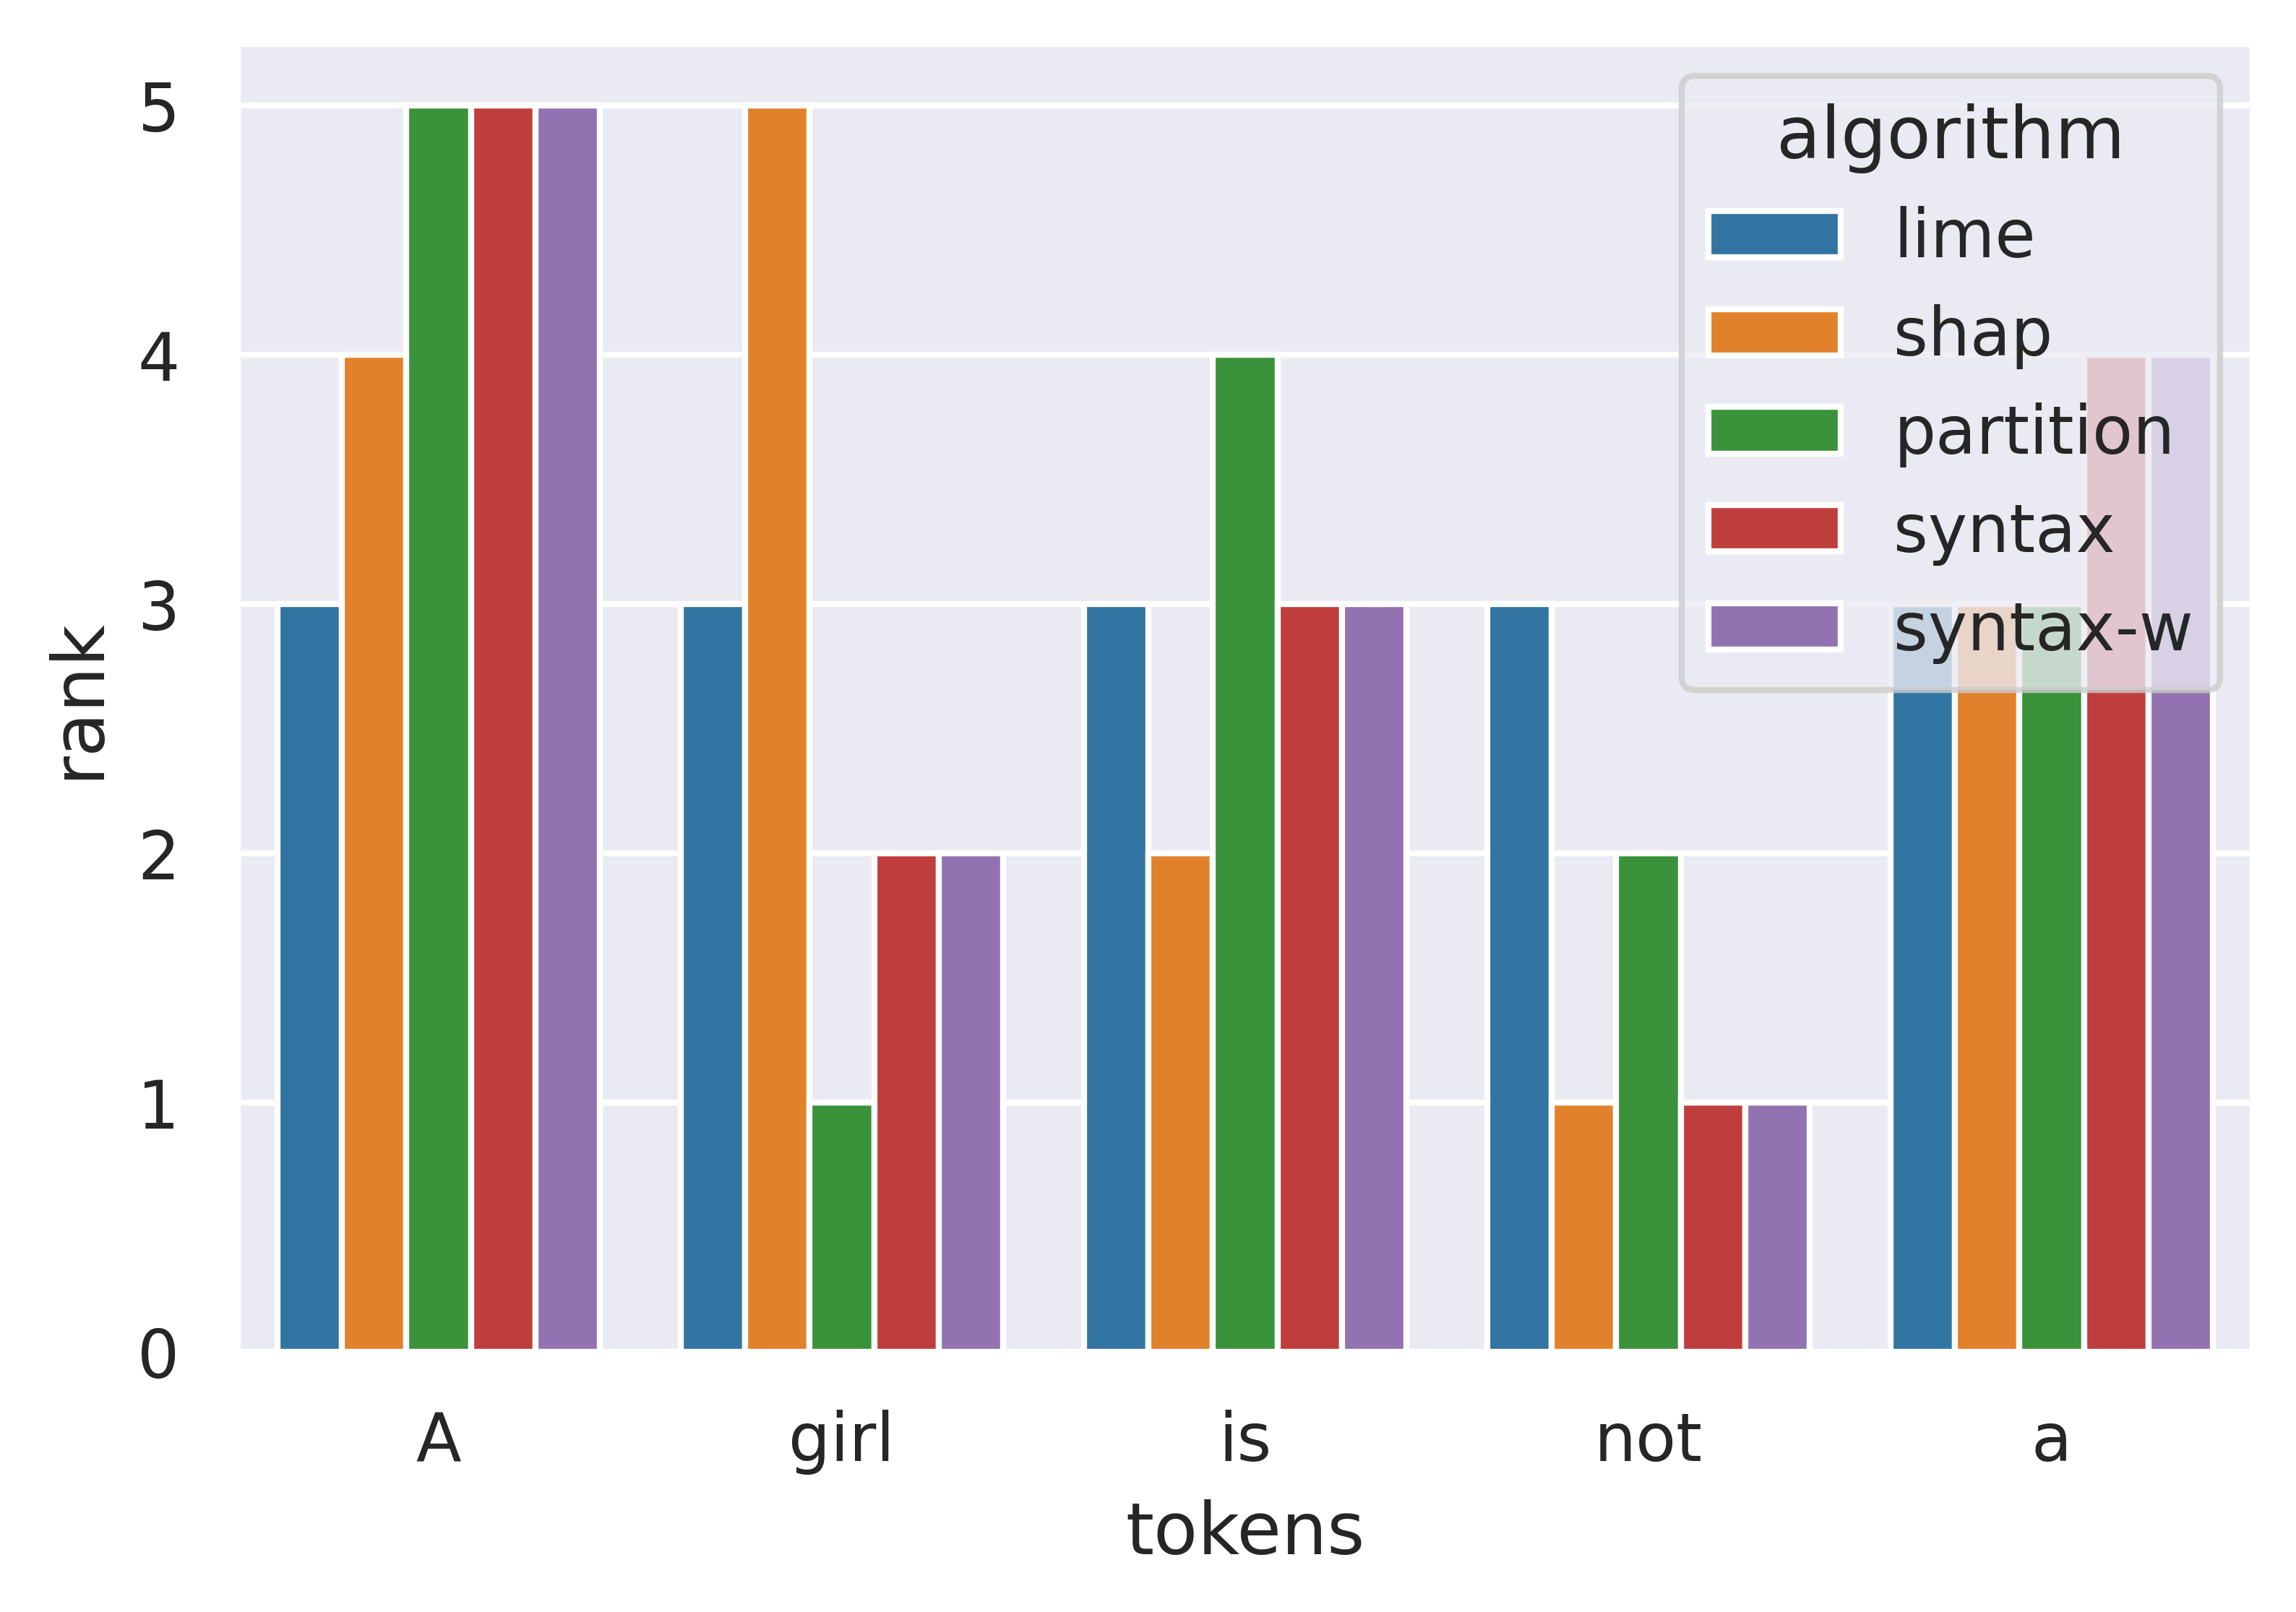

In [62]:

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

sns.barplot(x='tokens', y='rank', hue='algorithm', data=df, palette=palette)


In [68]:
df

,tokens,explanation,algorithm,rank,inv_rank
15,A,1011.0,partition,5.0,1.0
15,girl,-15591.0,partition,1.0,5.0
15,is,-7770.0,partition,4.0,2.0
15,not,-10870.0,partition,2.0,4.0
15,a,-9509.0,partition,3.0,3.0
16,A,0.627284,syntax-w,5.0,1.0
16,girl,-0.010315,syntax-w,2.0,4.0
16,is,0.071414,syntax-w,3.0,3.0
16,not,-0.030519,syntax-w,1.0,5.0
16,a,0.342136,syntax-w,4.0,2.0


/tmp/ipykernel_26212/3307771496.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels)


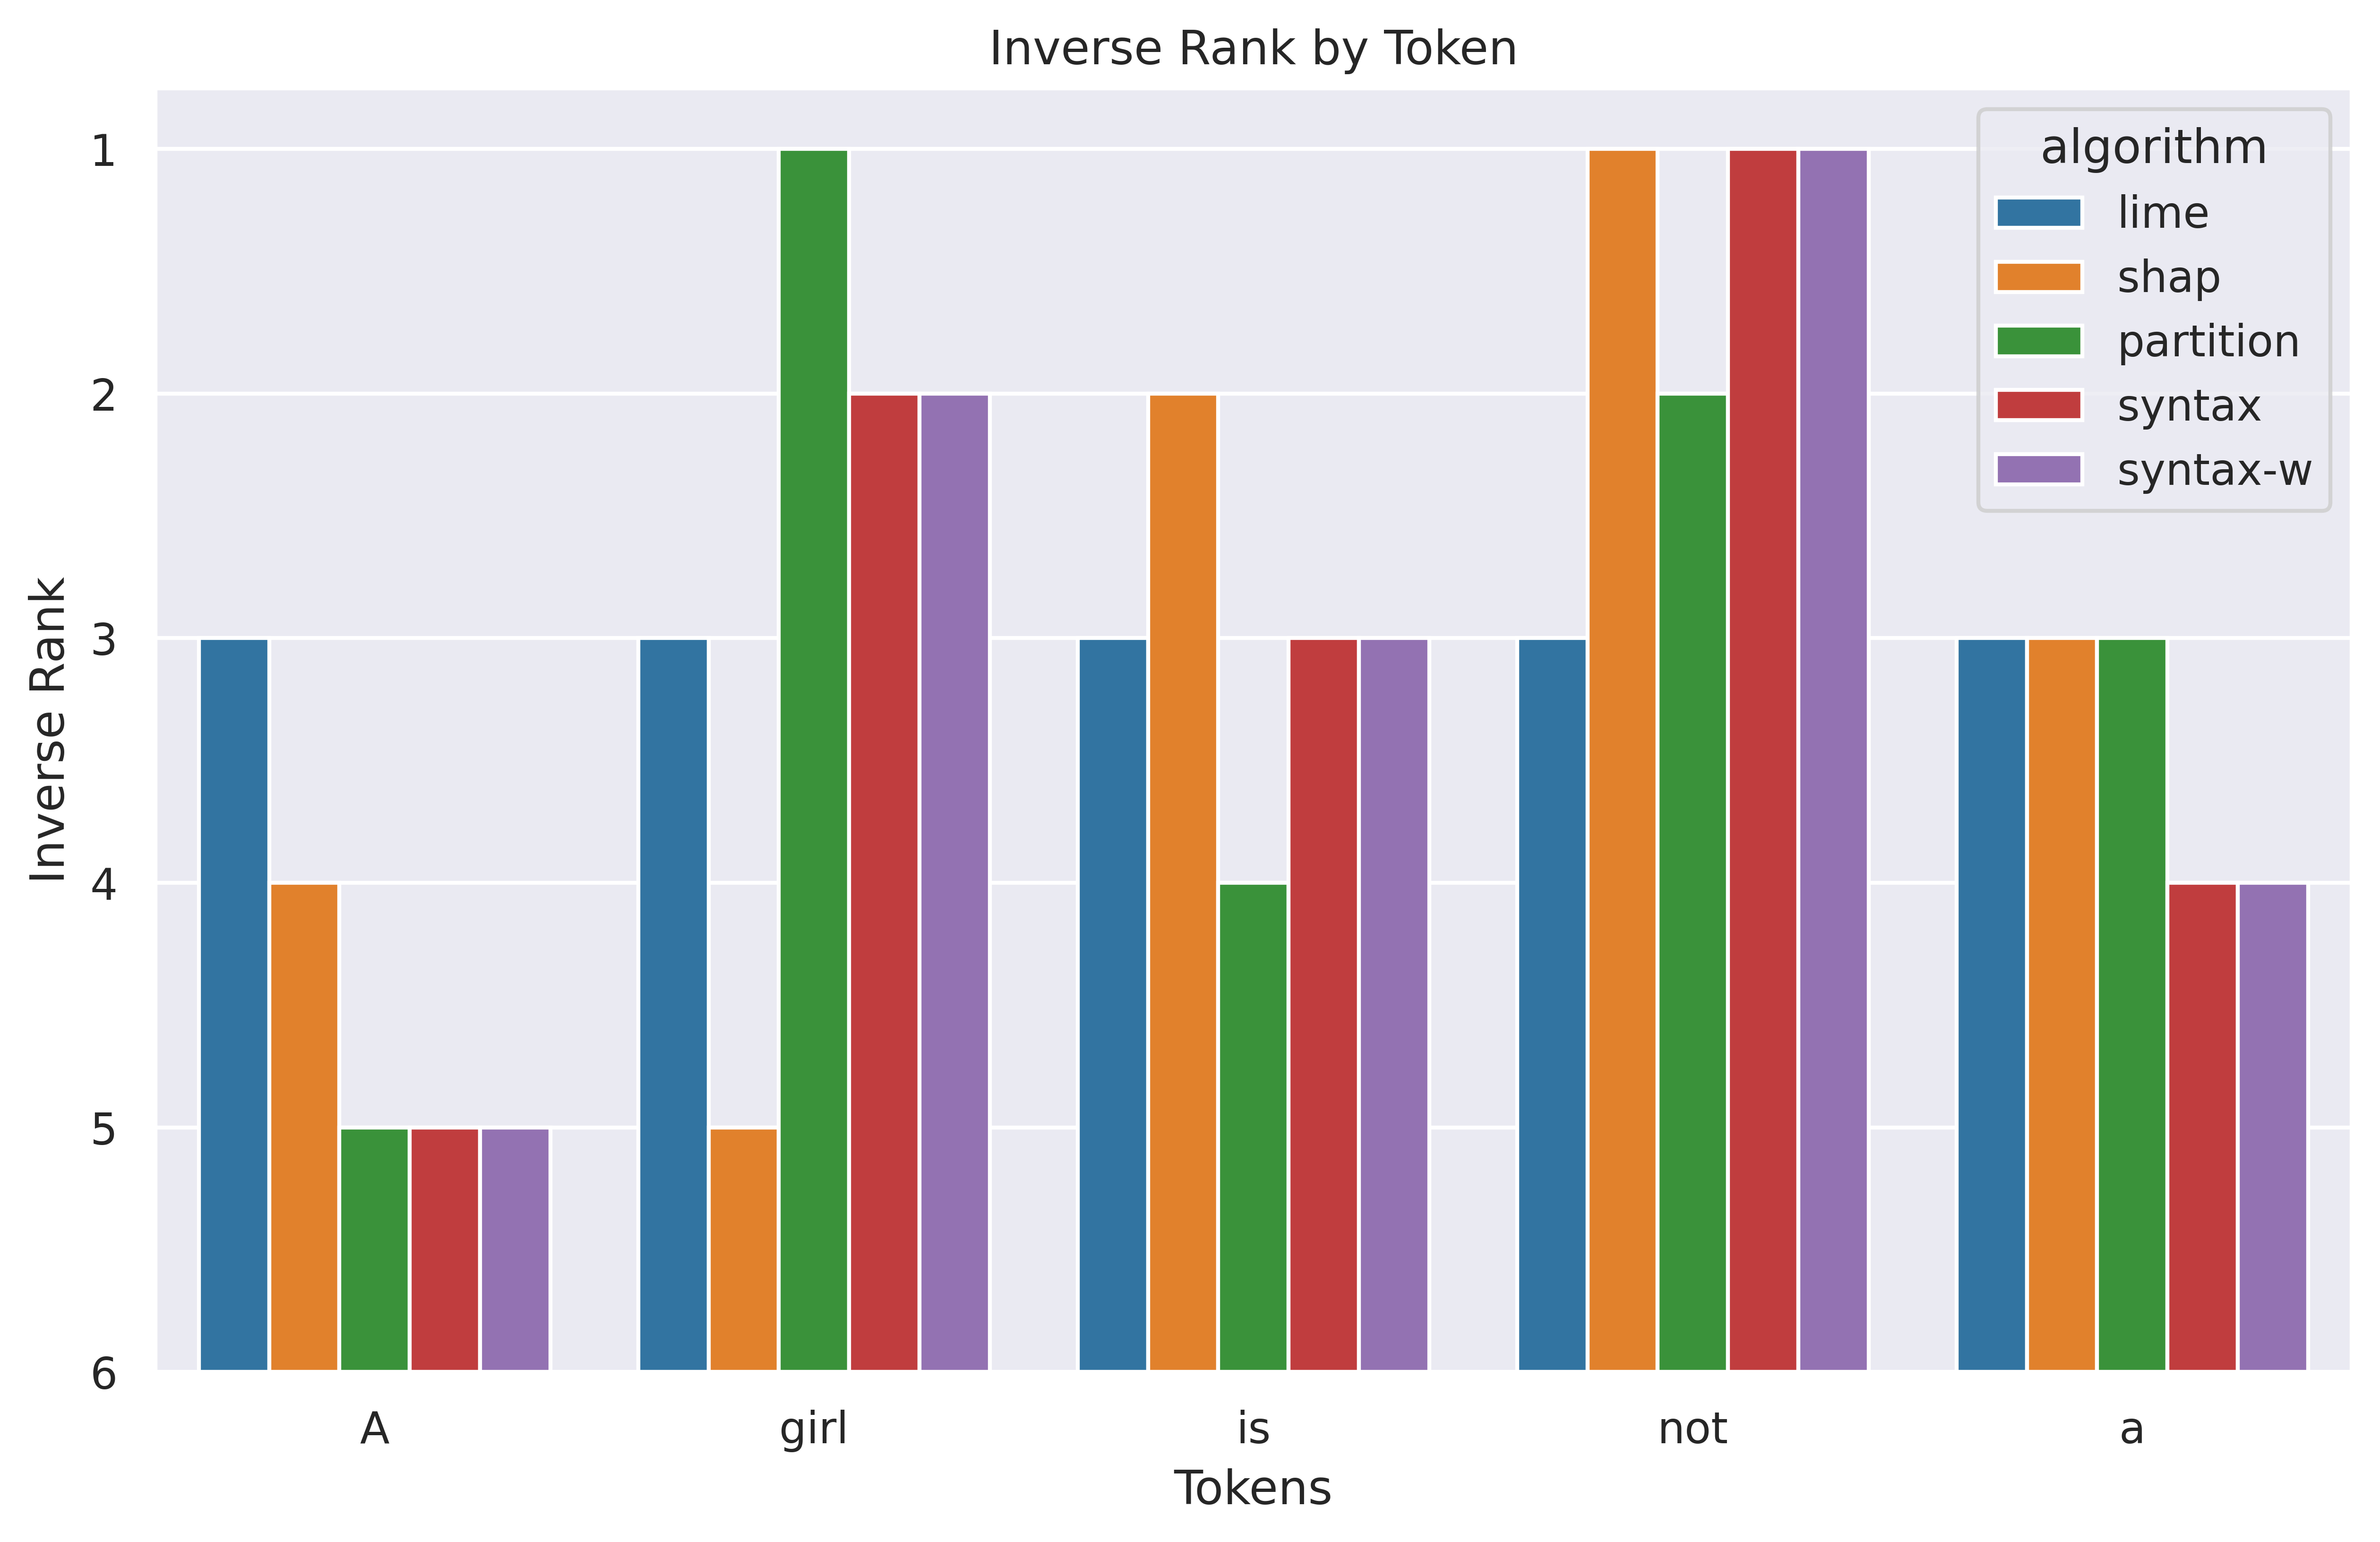

In [78]:
# Inverse the rank
max_rank = 5
df['inv_rank'] = max_rank - df['rank'] + 1  # Adding 1 to start the rank from 1 instead of 0

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='tokens', y='inv_rank', hue='algorithm', data=df, palette=palette)


# Relabel the y-axis
num_ticks = df['inv_rank'].nunique()
new_labels = [str(i) for i in range(num_ticks+1, 0, -1)]  # Reverse order
ax.set_yticklabels(new_labels)

plt.title('Inverse Rank by Token')
plt.xlabel('Tokens')
plt.ylabel('Inverse Rank')
plt.show()